## DSS Worshop: Synthetic Data Generation With SDV
Data privacy is increasingly becoming an important consideration when we tackle any data science use-case. In order to comply with regulation and still innovate and create value, Privacy Enhancing Techniques (PETs) are worth considering. For a broad overview of PETs, we invite you to follow our sub-community in DS4A and check out our wiki and our past talks. If you are interested in PETs and would like to contribute with ideas, talks, questions, use-cases or introduce us to a cool technique you have seen somewhere, you are the most welcome !

Synthetic data generation is one of the hottest PETs, so this workshop aims to introduce synthetic data generation using the Synthetic Data Vault library (https://sdv.dev/). We will explore together an example of synthetic data generation on a simple insurance dataset. First, we will load an visualize our dataset. Then, we will test the following synthetic data generation models:
- Gaussian Copula
- CTGAN
- TVAE

### Guidelines for the workshop
- We recommend that you complete this workshop using Colab, you can use your favorite notebook environment if you wish, but we won't be able to help with errors due to environment settings
- You will have sections marked **TO DO** that contain comments `#Your code` for you to fill in. You will be given time to complete the sections and we will discuss together. The instructions will be explained before each exercise.
- At any given moment, you can ask questions. **Please interreupt the speaker if you are unable to run the notebook**. You can also use the chat to ask questions and we will read the questions.

**!!! SKIP IF ALREADY EXECUTED !!!**

In [1]:
!pip install matplotlib==3.1.3
!pip install -U numpy
!pip install sdv
!pip install -U seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl size=12068419 sha256=b2f9d6eb0094ccd319644eb47ae3c601bb5f65f8c56e6f0eaf9da01072b231e2
  Stored in directory: /root/.cache/pip/wheels/a7/83/5a/c704868d367ace343ac89b928f3d937313a5b5fb5731483705
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.8.1 requires matplotlib>=

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 96.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 111.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**!!!!!!!!!!!!!!!!!!!!!!!!!!!!**

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.lite import SingleTablePreset
from sdv.single_table import CTGANSynthesizer, GaussianCopulaSynthesizer, TVAESynthesizer, CopulaGANSynthesizer
from sdv.evaluation.single_table import evaluate_quality, get_column_plot

### Load and visualize the dataset

In [2]:
url = 'https://raw.githubusercontent.com/oumasab/dss-workshop/main/insurance.csv'
df = pd.read_csv(url)
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

#### Display the dataset using seaborn.pairplot()
**TO DO:** Let's modify the variable `hue` to visualize data's dependence on the categorical variables

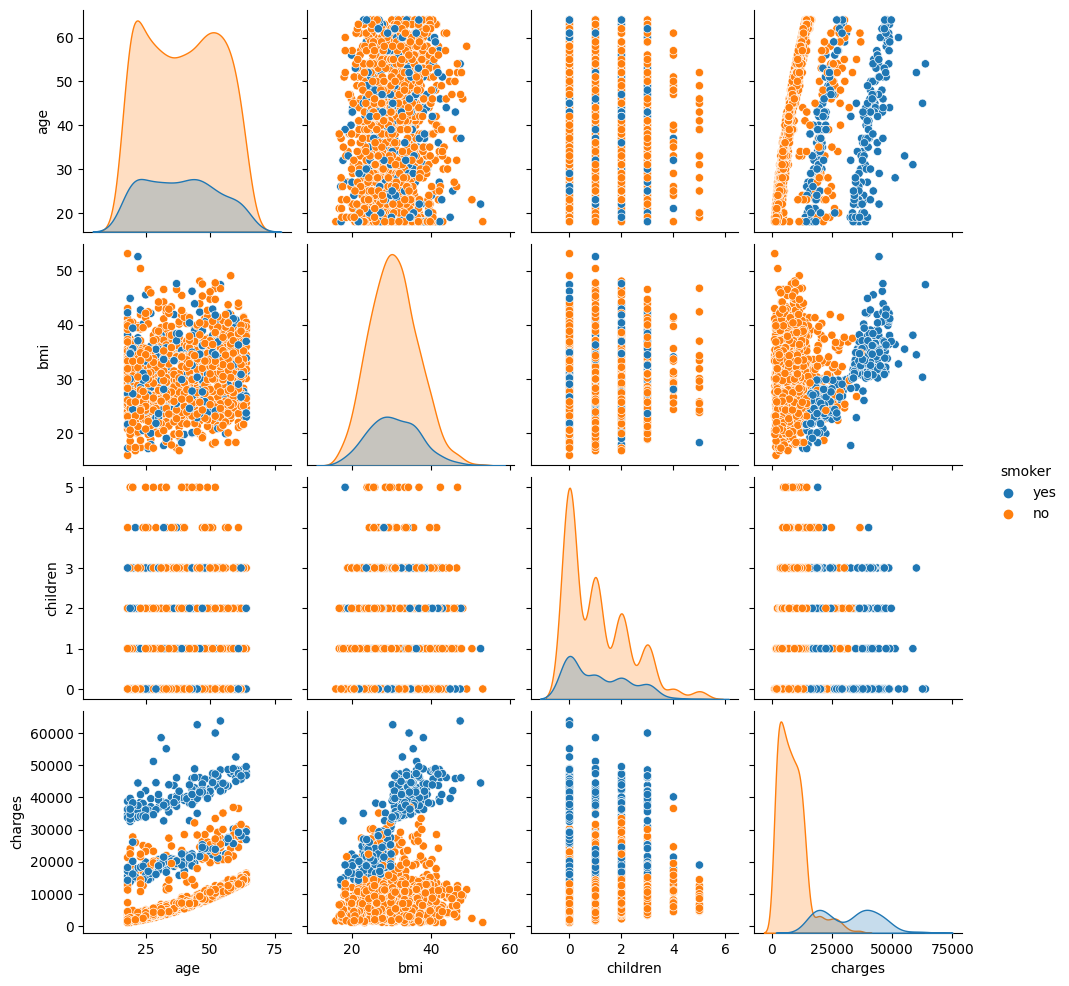

In [4]:
sns.pairplot(data=df, hue="smoker")
plt.show()

### First attempt at Synthetic data generation
Let's generate a first version of synthetic data. Here, we will use the models directly on our dataset without any additional feature engineering.

#### Quick usage of SDV models
Nothing is easier than getting started with SDV models. All you have to do is to follow these steps:
1. Load your dataset as Pandas `DataFrame`
2. (Optional, but recommended for the Tabular Preset) Define you dataset's metadata (description of column types)
3. Initialize the model
4. Use the `fit()` method
5. Sample new data using the `sample()` method

In [14]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)

#### Single Table Preset
The `SingleTablePreset` is a tabular model that comes with pre-configured settings. This is meant for users who want to get started with using synthetic data and spend less time worrying about which model to choose or how to tune its parameters.
The `FAST_ML` preset uses machine learning (ML) to model your data while optimizing for the modeling time. This is a great choice if it’s your first time using the SDV for a large custom dataset or if you’re exploring the benefits of using ML to create synthetic data.

In [15]:
model_fastml = SingleTablePreset(name='FAST_ML', metadata=metadata)
model_fastml.fit(df)

In [16]:
df_fastml = model_fastml.sample(1400)

**Let's visualize the synthetic data**

**TO DO:** Visualize the synthetic data using `sns.pairplot()`

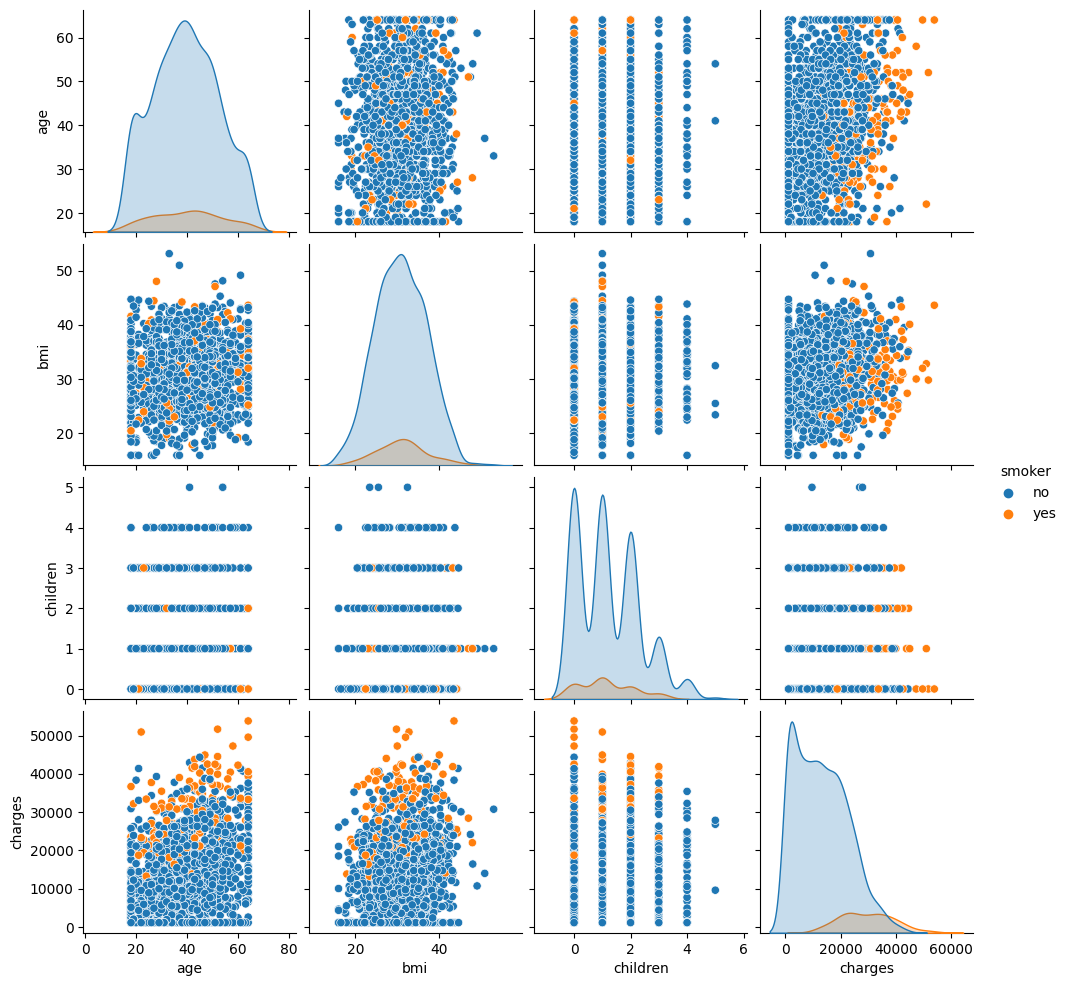

In [17]:
sns.pairplot(data=df_fastml, hue="smoker")
plt.show()

#### Gaussian Copula
The `sdv.single_table.GaussianCopulaSynthesizer` model is based on copula funtions.

In mathematical terms, a copula is a distribution over the unit cube $[0,1]^{𝑑}$ which is constructed from a multivariate normal distribution over $ℝ^{𝑑}$ by using the probability integral transform. Intuitively, a copula is a mathematical function that allows us to describe the joint distribution of multiple random variables by analyzing the dependencies between their marginal distributions. 

In order to "learn" the original dataset, the `GaussianCopulaSynthesizer()` model performs the following steps:

1. Learn the format and data types of the passed data

2. Transform the non-numerical and null data using Reversible Data Transforms to obtain a fully numerical representation of the data from which we can learn the probability distributions.

3. Learn the probability distribution of each column from the table

4. Transform the values of each numerical column by converting them to their marginal distribution CDF values and then applying an inverse CDF transformation of a standard normal on them.

5. Learn the correlations of the newly generated random variables.

After this, in order to generate the synthetic dataset using the trained model, the following steps are performed:

1. Sample from a Multivariate Standard Normal distribution with the learned correlations.

2. Revert the sampled values by computing their standard normal CDF and then applying the inverse CDF of their marginal distributions.

3. Revert the RDT transformations to go back to the original data format.


In [19]:
model_gaussian = GaussianCopulaSynthesizer(metadata=metadata)
model_gaussian.fit(df)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:100: UserWarning: No rounding scheme detected for column 'charges'. Data will not be rounded.
  warnings.warn(


In [20]:
df_gaussian = model_gaussian.sample(1400)

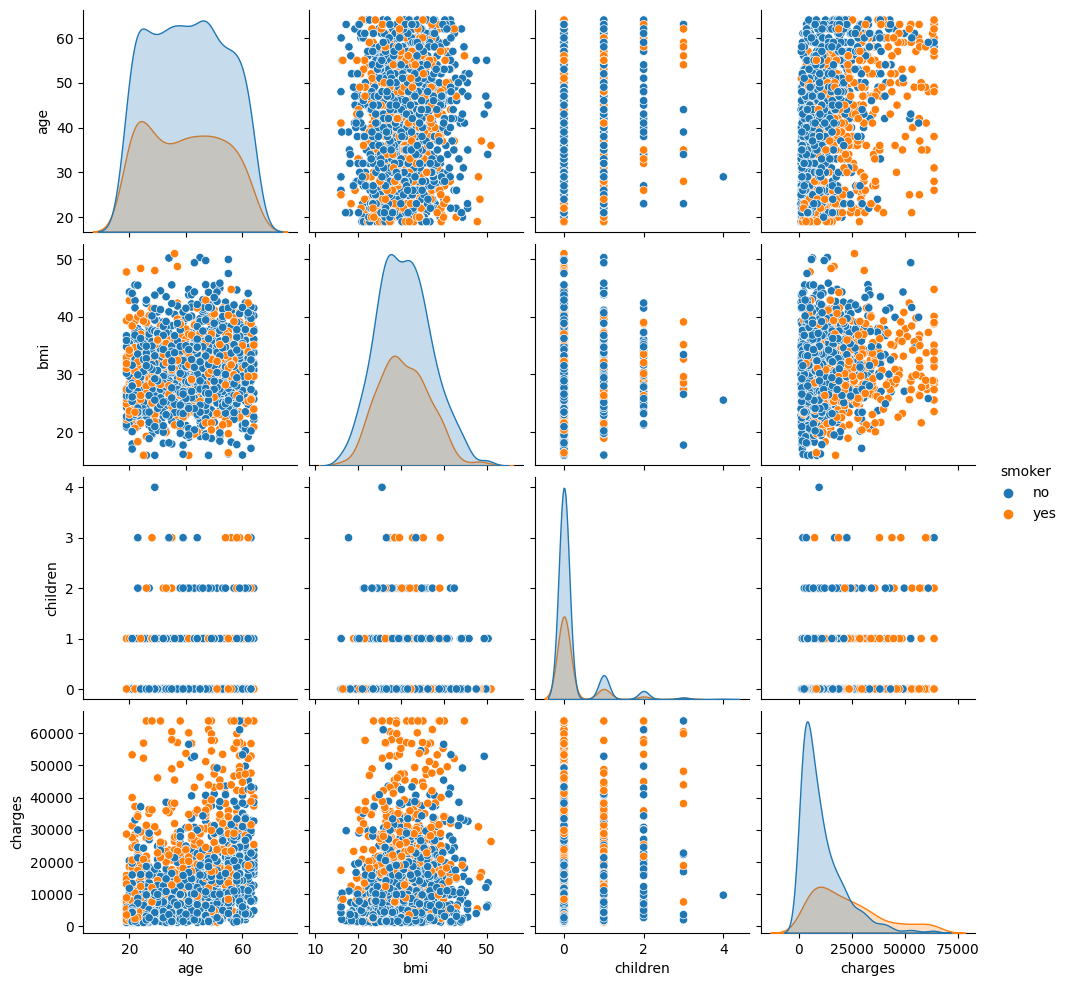

In [22]:
sns.pairplot(data=df_gaussian, hue="smoker")
plt.show()

**Train a CTGAN model**

#### CTGAN
The `sdv.single_table.CTGANSynthesizer` model is based on the GAN-based Deep Learning data synthesizer which was presented at the NeurIPS 2020 conference by the paper titled Modeling Tabular data using Conditional GAN.

A few details about CTGAN:
- GAN-based method to sample from the distribution of the input data
- This method is more adapted to deal with class imbalance in categorical variables as the Generator uses training-by-sampling
- Both the Generator and Discriminator are fully connected networks, which allows to capture all correlations between features
- CTGAN achieves Differential Privacy as the CTGAN Generator never accesses the real data throughout training

**TO DO:** Train then sample data from a CTGAN model. Visualize the result.

In [24]:
model_ctgan = CTGANSynthesizer(metadata=metadata)
model_ctgan.fit(df)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:100: UserWarning: No rounding scheme detected for column 'charges'. Data will not be rounded.
  warnings.warn(


In [25]:
df_ctgan = model_ctgan.sample(1400)

**Visualize the synthetic dataset**

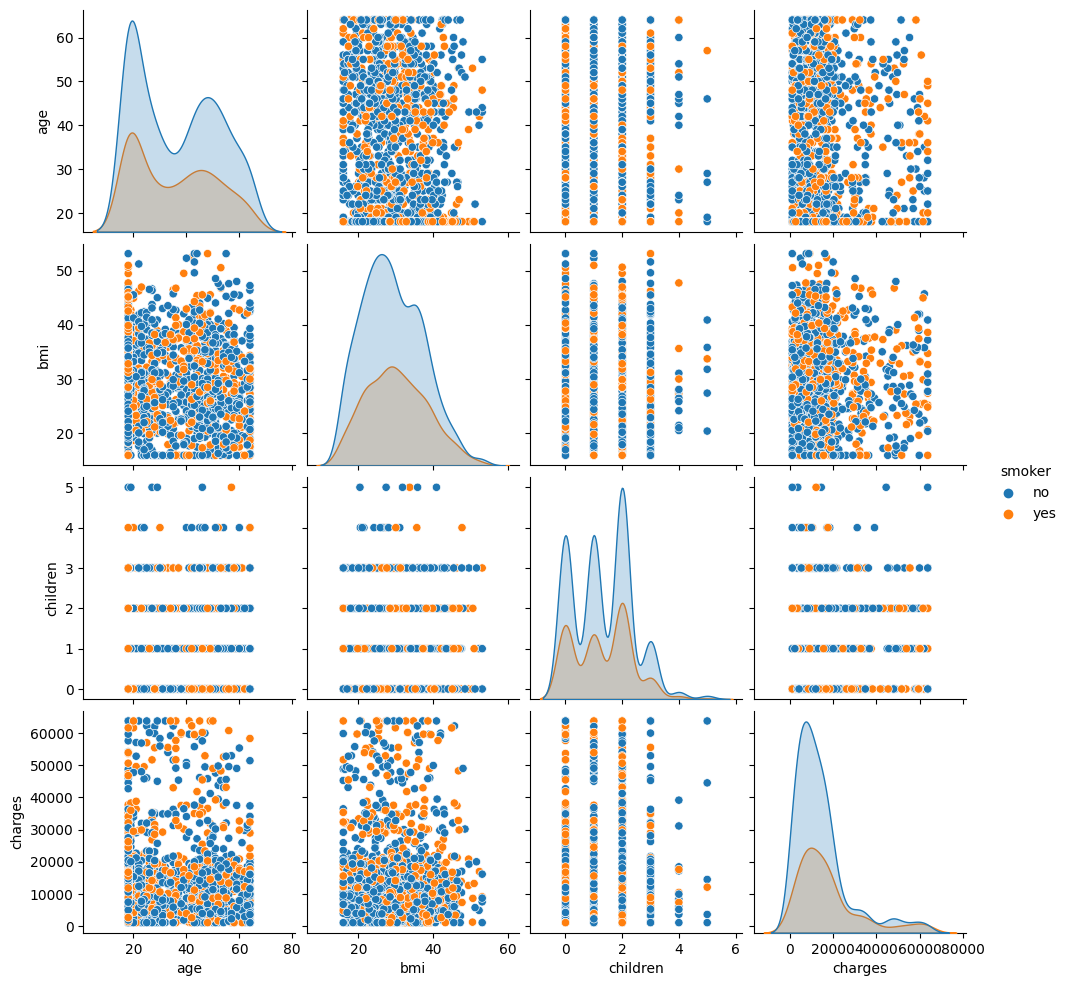

In [26]:
sns.pairplot(data=df_ctgan, hue="smoker")
plt.show()

#### TVAE
The `sdv.tabular.TVAESynthesizer` model is based on the VAE-based Deep Learning data synthesizer which was presented at the NeurIPS 2020 conference by the paper titled Modeling Tabular data using Conditional GAN.

A few details about TVAE:
- An adaptation of VAE for tabular data: the encoder is adapted to work with tabular data, the decoder is kept as in classic VAE
- In a nutshell, TVAE (much like VAE) is composed of an encoder that transforms input to a latent space, then a decoder that samples new data from the latent space
- Unlike CTGAN, TVAE is not compatible with Differential Privacy

**TO DO:** Train then sample data from a TVAE model. Visualize the result.

In [27]:
model_tvae = TVAESynthesizer(metadata=metadata)
model_tvae.fit(df)
df_tvae = model_tvae.sample(1400)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:100: UserWarning: No rounding scheme detected for column 'charges'. Data will not be rounded.
  warnings.warn(


**Visualize the generated dataset**

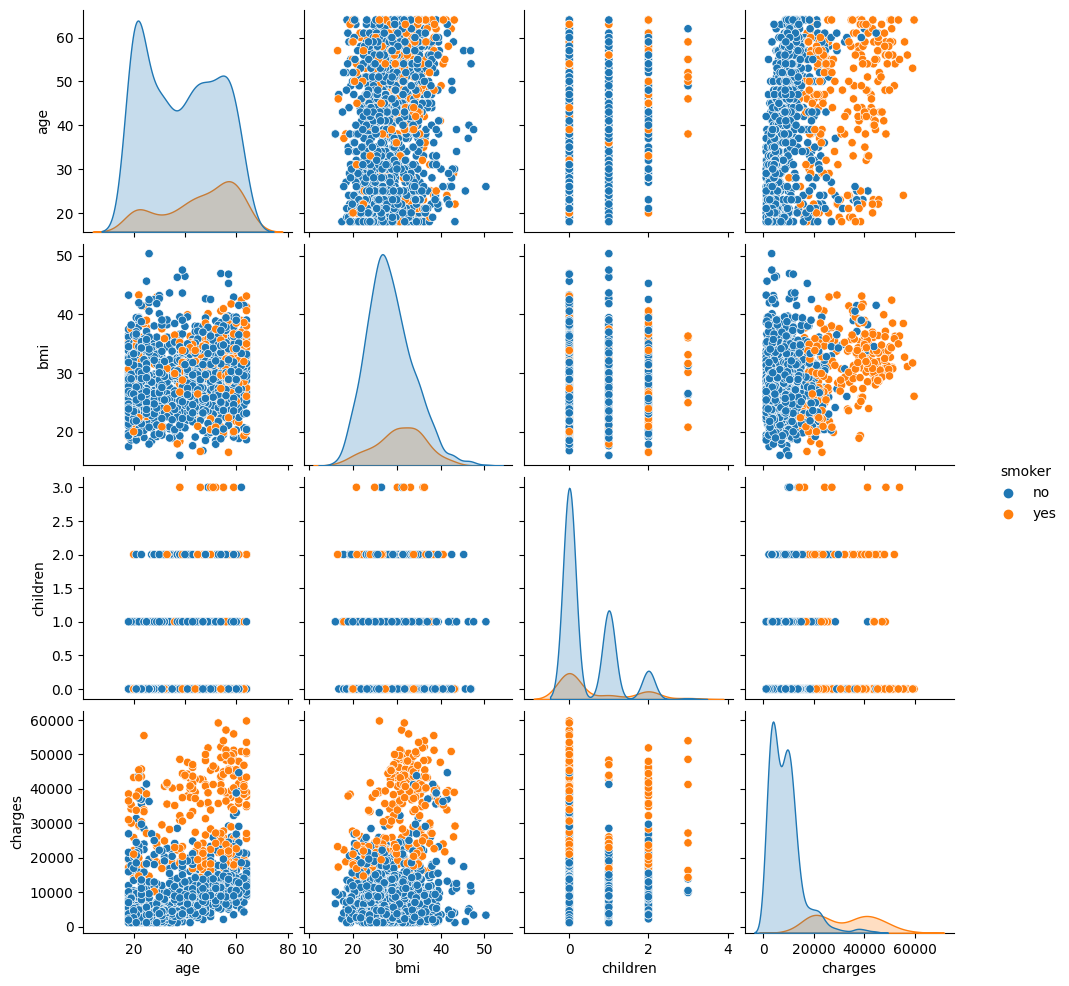

In [29]:
sns.pairplot(data=df_tvae, hue="smoker")
plt.show()

#### Deep-dive into a few features
**Visualize the figure of charges w.r.t to age in the synthetic dataset and the real dataset in the same figure using `sns.scatterplot()`**

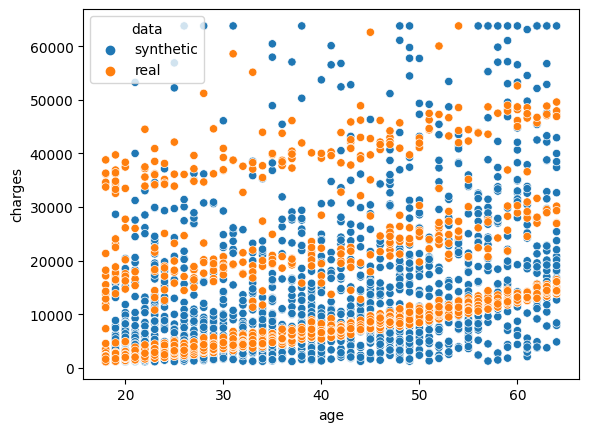

In [30]:
to_plot = df_gaussian[["age", "charges"]]
to_plot["data"] = "synthetic"
to_plot = pd.concat([to_plot, df[["age", "charges"]]])
to_plot.fillna("real", inplace=True)
sns.scatterplot(data=to_plot, x="age", y="charges", hue="data")
plt.show()

:**Visualize the distributions of given features in the synthetic data using `sdv.evaluation.single_table.get_column_plot()`**

**TO DO:** Change the parameter `column_name` to visualize different variables

In [ ]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=df_gaussian,
    column_name='charges',
    metadata=metadata
)

fig.show()

**Evaluate similarity metrics**
- **Inverted Kolmogorov-Smirnov D statistic:** evaluates the similarity of distributions of continuous variables between the synthetic and real data
- **Chi-Squared:** evaluates the similarity of distributions of categorical variables between the synthetic and real data

#### Evaluate the models
SDV offers the possibility to evaluate the quality of the generated data using `sdv.evaluation.single_table.evaluate_quality`, which is the newest model evaluation framework and allows to visualize quality metrics

In [35]:
columns = ["age", "sex", "bmi", "children", "smoker", "region", "charges"]
real_data = df[columns]
synthetic_data = df_gaussian[columns]

**Visualize the Quality report**
The quality report relies on two main metrics:
- **Total Variation Distance:** which evaluates the similarity between two discrete distributions (used for categorical variables)
- **Inverted Kolmogorov-Smirnov D statistic:** which evaluates the similarity between two continuous distributions

In [39]:
report = evaluate_quality(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata)

Creating report: 100%|██████████| 4/4 [00:00<00:00, 14.37it/s]



Overall Quality Score: 87.21%

Properties:
Column Shapes: 88.44%
Column Pair Trends: 85.97%


In [40]:
report.get_details(property_name='Column Shapes')

Column        Metric  Quality Score
0       age  KSComplement       0.919751
1       bmi  KSComplement       0.975631
2  children  KSComplement       0.569713
3   charges  KSComplement       0.894905
4       sex  TVComplement       0.985483
5    smoker  TVComplement       0.877640
6    region  TVComplement       0.967900

In [ ]:
fig = report.get_visualization(property_name='Column Shapes')

**A focus on data privacy**

This metric measures whether each row in the synthetic data is novel, or whether it exactly matches an original row in the real data.

Score:
- (best) 1.0: The rows in the synthetic data are all new. There are no matches with the real data.
- (worst) 0.0: All the rows in the synthetic data are copies of rows in the real data.

In [41]:
from sdmetrics.single_table import NewRowSynthesis

NewRowSynthesis.compute(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata,
    numerical_match_tolerance=0.01,
)

1.0

### Let's improve our model !
At this stage, we need to ask ourselves: is this the best we can do? It seems like we can do better since the models that we have seen so far have failed to capture some of the correlations that we have visualized in the original dataset. 

**Preliminary question:** Which features do you propose to transform in order to improve the results? Let's hear your ideas !

#### Feature engineering


**Focus on charges vs. age**

**TO DO** Visualize `charges` vs. `age` using `sns.scatterplot()`

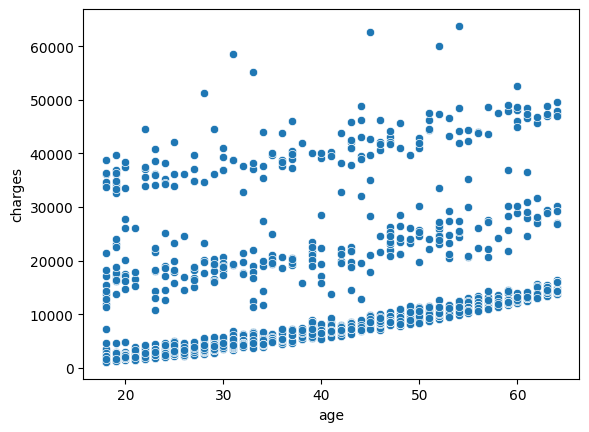

In [42]:
sns.scatterplot(data=df, x="age", y="charges")
plt.show()

In [43]:
df_2 = df.copy()

**TO DO:** Define a new variable that describes the tiers of charges, let's call it `tier`. It is defined as follows:
- `tier 1` if `charges<15000`
- `tier 2` if `charges>=15000` and `charges<33000`
- `tier 3` if `charges>=33000`

**TO DO:** Visualize `charges` vs. `age` using `tier` as a legend.

In [44]:
# Let's define charges tiers
df_2["tier"] = "tier 1"
df_2.loc[(df_2["charges"]>=15000) & (df_2["charges"]<33000), "tier"] = "tier 2"
df_2.loc[df_2["charges"]>=33000, "tier"] = "tier 3"

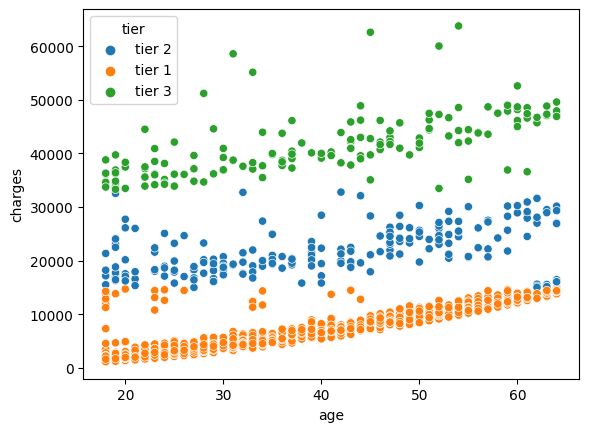

In [45]:
sns.scatterplot(data=df_2, x="age", y="charges", hue="tier")
plt.show()

**Transform charges by substracting the fixed charge associated to each tier**

In [46]:
# Let's define the fixed charge for each tier
fixed_charge_1 = df_2.loc[(df_2["tier"]=="tier 1") & (df_2["age"]==18), "charges"].min()
fixed_charge_2 = df_2.loc[(df_2["tier"]=="tier 2") & (df_2["age"]==18), "charges"].min()
fixed_charge_3 = df_2.loc[(df_2["tier"]=="tier 3") & (df_2["age"]==18), "charges"].min()
df_2.loc[df_2["tier"]=="tier 1", "fixed_charge"] = fixed_charge_1
df_2.loc[df_2["tier"]=="tier 2", "fixed_charge"] = fixed_charge_2
df_2.loc[df_2["tier"]=="tier 3", "fixed_charge"] = fixed_charge_3

In [47]:
# Let's subtract the fixed charge from charges for all tiers
df_2["charges"] = df_2["charges"] - df_2["fixed_charge"]
df_2.drop(columns=["fixed_charge"], inplace=True)

**Visualize the new values of `charges` vs. `age`**

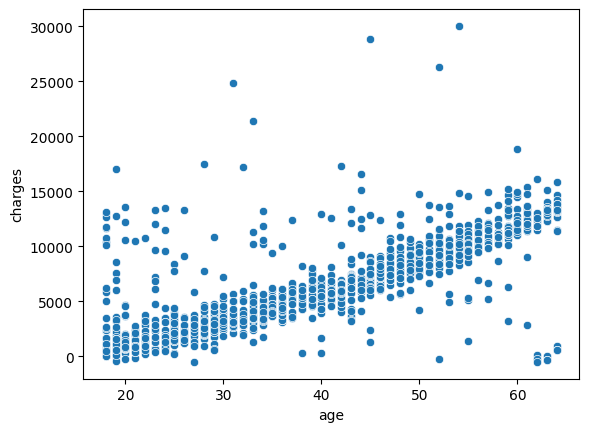

In [48]:
sns.scatterplot(data=df_2, x="age", y="charges")
plt.show()

**Visualize a fitted polynomial to `charges` vs `age`**

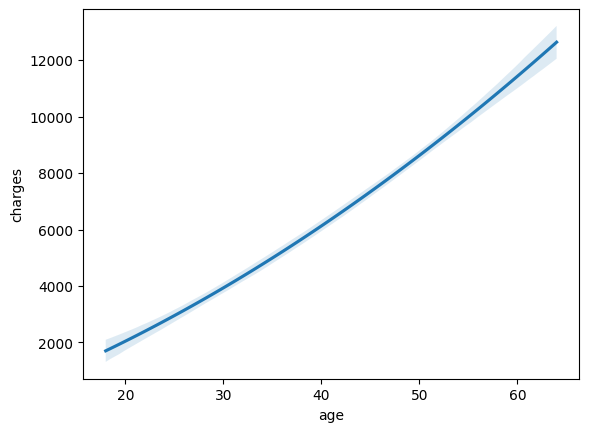

In [49]:
sns.regplot(data=df_2, x="age", y="charges", order=2, scatter=False)
plt.show()

**TO DO:** Based on what we have seen previously, create a new feature that accounts for the order of the polynomial that describes the relationship between `charges` and `age`

In [50]:
# Let's take into account the above observation !
df_2["age_squared"] = df_2["age"]**2

In [53]:
metadata_2 = SingleTableMetadata()
metadata_2.detect_from_dataframe(data=df_2)

#### Let's train a synthetic data generation model

**TO DO:** Train then sample data from a synthetic data generation model of your choice (`GuassianCopula`, `CTGAN` or `TVAE`) using the new transformed dataset. 

In [54]:
model_gaussian_2 = GaussianCopulaSynthesizer(metadata=metadata_2)
model_gaussian_2.fit(df_2)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:100: UserWarning:

No rounding scheme detected for column 'charges'. Data will not be rounded.



In [55]:
df_gaussian_2 = model_gaussian_2.sample(1400)

**Transform the real data back to its original form:** Add the corresponding fixed charge to the charges of each tier in the real data

In [56]:
df_2.loc[df_2["tier"]=="tier 1", "fixed_charge"] = fixed_charge_1
df_2.loc[df_2["tier"]=="tier 2", "fixed_charge"] = fixed_charge_2
df_2.loc[df_2["tier"]=="tier 3", "fixed_charge"] = fixed_charge_3
df_2["charges"] = df_2["charges"] + df_2["fixed_charge"]
df_2.drop(columns=["fixed_charge", "age_squared"], inplace=True)

**TO DO:** Transform the synthetic data back

In [57]:
# Let's transform the data back
df_gaussian_2.loc[df_gaussian_2["tier"]=="tier 1", "fixed_charge"] = fixed_charge_1
df_gaussian_2.loc[df_gaussian_2["tier"]=="tier 2", "fixed_charge"] = fixed_charge_2
df_gaussian_2.loc[df_gaussian_2["tier"]=="tier 3", "fixed_charge"] = fixed_charge_3
df_gaussian_2["charges"] = df_gaussian_2["charges"] + df_gaussian_2["fixed_charge"]
df_gaussian_2.drop(columns=["fixed_charge", "age_squared"], inplace=True)

**Visualize the synthetic data**

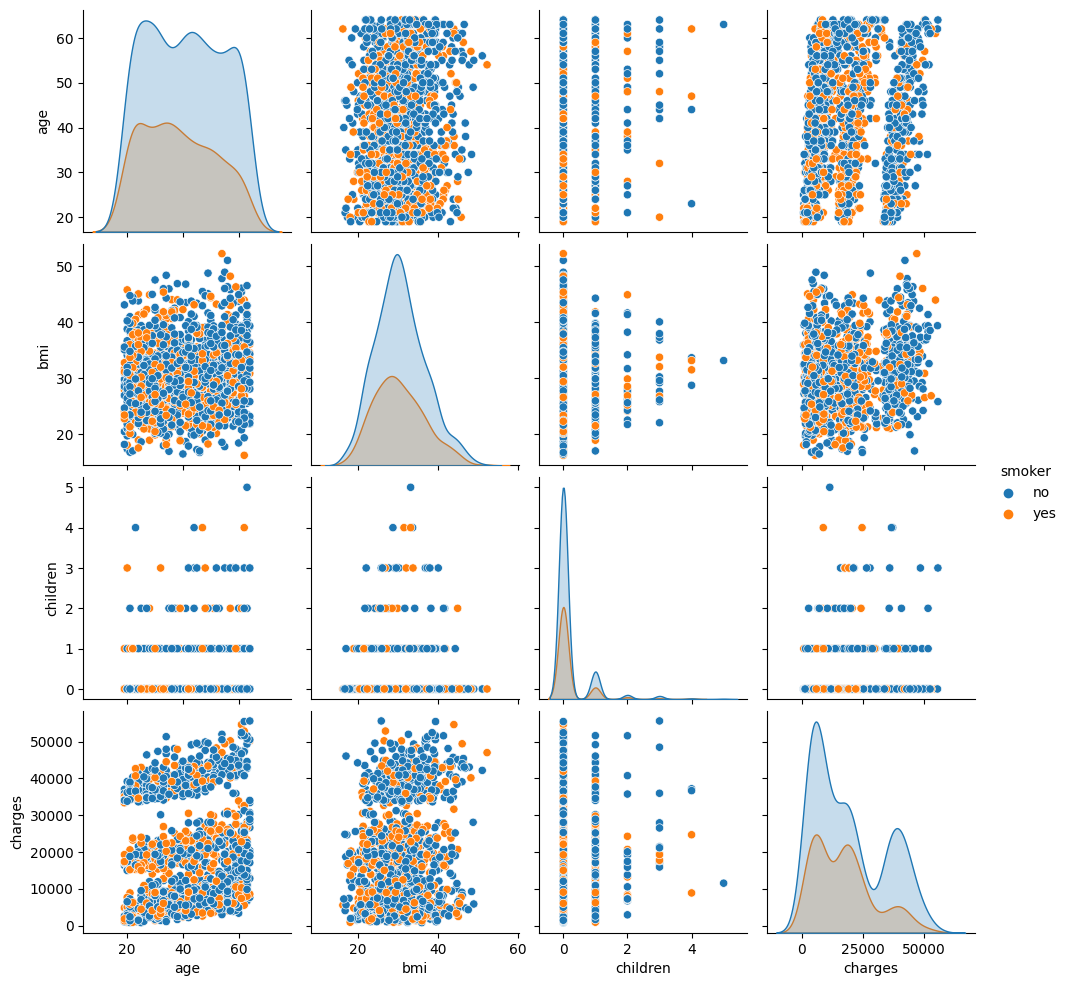

In [58]:
sns.pairplot(data=df_gaussian_2, hue="smoker")
plt.show()

#### Let's evaluate the new generated data

In [59]:
columns = ["age", "sex", "bmi", "children", "smoker", "region", "charges"]
real_data = df_2[columns]
synthetic_data = df_gaussian_2[columns]

**TO DO:** Evaluate the synthetic data using `sdv.evaluation.single_table.evaluate_quality`

In [60]:
report = evaluate_quality(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata)
fig = report.get_visualization(property_name='Column Shapes')
fig.show()

Creating report: 100%|██████████| 4/4 [00:00<00:00, 32.10it/s]



Overall Quality Score: 85.08%

Properties:
Column Shapes: 86.2%
Column Pair Trends: 83.96%


**TO DO:** Plot `charges` vs. `age` in the synthetic dataset vs. the real dataset. Let's discuss !

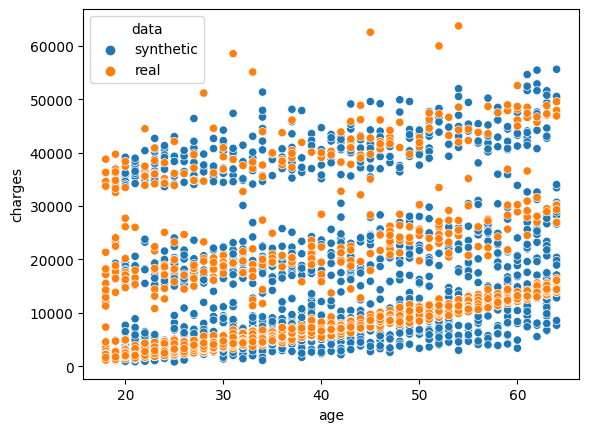

In [61]:
to_plot = df_gaussian_2[["age", "charges"]]
to_plot["data"] = "synthetic"
to_plot = pd.concat([to_plot, df_2[["age", "charges"]]])
to_plot.fillna("real", inplace=True)
sns.scatterplot(data=to_plot, x="age", y="charges", hue="data")
plt.show()

**TO DO:** Visualize individual feature distributions using `get_column_plot`

In [62]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=df_gaussian,
    column_name='charges',
    metadata=metadata
)

fig.show()

In [63]:
report.get_details(property_name='Column Shapes')

Column        Metric  Quality Score
0       age  KSComplement       0.917608
1       bmi  KSComplement       0.960025
2  children  KSComplement       0.571141
3   charges  KSComplement       0.729773
4       sex  TVComplement       0.994054
5    smoker  TVComplement       0.884069
6    region  TVComplement       0.977195

### Synthetic data generation limitations

- **Quality metrics**: As we saw in this example, the metrics might not accurately reflect the quality of the generated data. It is very important to rely on visualization in order to get a better idea of the quality of the synthetic dataset.
- **Models:** As in every ML problem, selecting the right model is a process that needs to be taken seriously. An essential first step towards selecting a good model is to understand the correlations within the data and define features that will be helpful for the model training. We saw here that without feature engineering, the models aren't very performant and that feature engineering improved the results significantly.
- **Bigger is not always better**: We might easily think that CTGAN would work every single time, but we have seen in this example that a simple model like a Gaussian Copula can work even better than CTGAN if it's coupled with good feature engineering. For small datasets (like the one we tried here), using large models like CTGAN might result in overfitting and poor generalization, which hinders the capabiliy to generate a good synthetic dataset.

- **PII columns**: PII columns need to be processed before training a synthetic data generation model. This is due to the fact that text is considered as a categorical variable and displays it back into the synthetic dataset. So there is a risk of serious data leakage if PII is not treated correctly.

**Let's demonstrate the danger of not treating PII correctly**

**Let's create fake names and add them to the dataset**

In [64]:
from faker import Faker
fake = Faker()

In [89]:
names = [fake.name_male() if row["sex"]=="male" else fake.name_female() for _,row in df.iterrows()]
df["name"] = names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [90]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)

In [91]:
metadata.update_column(
    column_name='name',
    sdtype='name')

In [92]:
model_gaussian_pii = GaussianCopulaSynthesizer(metadata)
model_gaussian_pii.fit(df)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:100: UserWarning:

No rounding scheme detected for column 'charges'. Data will not be rounded.



In [93]:
df_gaussian_pii = model_gaussian_pii.sample(1400)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**Are any names from the real dataset repeated in the synthetic dataset?**

In [94]:
len(set(df_gaussian_pii["name"]) & set(df["name"]))

31

**How do we fix it?**

In [95]:
from rdt.transformers.pii import AnonymizedFaker

# create more realistic-looking data by specifying a provider and function
model_gaussian_pii.update_transformers(column_name_to_transformer={
    'name': AnonymizedFaker(provider_name='person', function_name='name'),
})

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:292: UserWarning:

For this change to take effect, please refit the synthesizer using `fit`.



In [96]:
model_gaussian_pii.fit(df)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:100: UserWarning:

No rounding scheme detected for column 'charges'. Data will not be rounded.



In [97]:
df_gaussian_pii_2 = model_gaussian_pii.sample(1400)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**Does it really work ?**

In [98]:
len(set(df_gaussian_pii_2["name"]) & set(df["name"]))

31